In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass,get_env_obj_names, set_env_obj, set_env_joint_configuration,get_env_joint_names,print_env_joint_infos
from pid import PID_ControllerClass
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


### Parsing `UR5e`

In [19]:
env = MuJoCoParserClass(name='UR5e',xml_path='../asset/ur5e/UR5_rg2_gripper.xml')
print ("[%s] parsed."%(env.name))

[UR5e] parsed.


### Get / Set `Configurations`

In [20]:
import math

init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]

joint_names = get_env_joint_names(env,prefix='ur_') # available objects
print(joint_names)
print()
set_env_joint_configuration(env, init_configurations, prefix='ur_')
print_env_joint_infos(env, prefix='ur_')


['ur_shoulder_pan_joint', 'ur_shoulder_lift_joint', 'ur_elbow_joint', 'ur_wrist_1_joint', 'ur_wrist_2_joint', 'ur_wrist_3_joint']

[0/6] joint_name:[ur_shoulder_pan_joint]
[0/6] joint_configurations:[-1.571]
[1/6] joint_name:[ur_shoulder_lift_joint]
[1/6] joint_configurations:[-2.356]
[2/6] joint_name:[ur_elbow_joint]
[2/6] joint_configurations:[2.356]
[3/6] joint_name:[ur_wrist_1_joint]
[3/6] joint_configurations:[1.571]
[4/6] joint_name:[ur_wrist_2_joint]
[4/6] joint_configurations:[0.785]
[5/6] joint_name:[ur_wrist_3_joint]
[5/6] joint_configurations:[-1.571]


### Get camera informations

In [21]:
cam_infos = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 0.0,
                    cam_elevation = -90.0,
                    cam_lookat    = [1.4,0.0,2.0])
cam_infos

{'cam_distance': 0.0,
 'cam_azimuth': 0.0,
 'cam_elevation': -90.0,
 'cam_lookat': array([1.4, 0. , 2. ])}

## Get multiple camera view

In [23]:
obj_names = get_env_obj_names(env,prefix='obj_') # see objects
colors = [plt.cm.gist_rainbow(x) for x in np.linspace(0,1,len(obj_names))]

for obj_idx,obj_name in enumerate(obj_names):
    obj_pos   = [-1.2,-0.3+0.1*obj_idx,0.8]
    obj_quat  = [0,0,0,1]
    obj_color = colors[obj_idx]
    set_env_obj(env=env,obj_name=obj_name,obj_pos=obj_pos,obj_quat=obj_quat,obj_color=obj_color)

# update object locations
env.forward(INCREASE_TICK=False)


[0/6] joint_name:[ur_shoulder_pan_joint]
[0/6] joint_configurations:[-1.571]
[1/6] joint_name:[ur_shoulder_lift_joint]
[1/6] joint_configurations:[-2.356]
[2/6] joint_name:[ur_elbow_joint]
[2/6] joint_configurations:[2.356]
[3/6] joint_name:[ur_wrist_1_joint]
[3/6] joint_configurations:[1.571]
[4/6] joint_name:[ur_wrist_2_joint]
[4/6] joint_configurations:[0.785]
[5/6] joint_name:[ur_wrist_3_joint]
[5/6] joint_configurations:[-1.571]


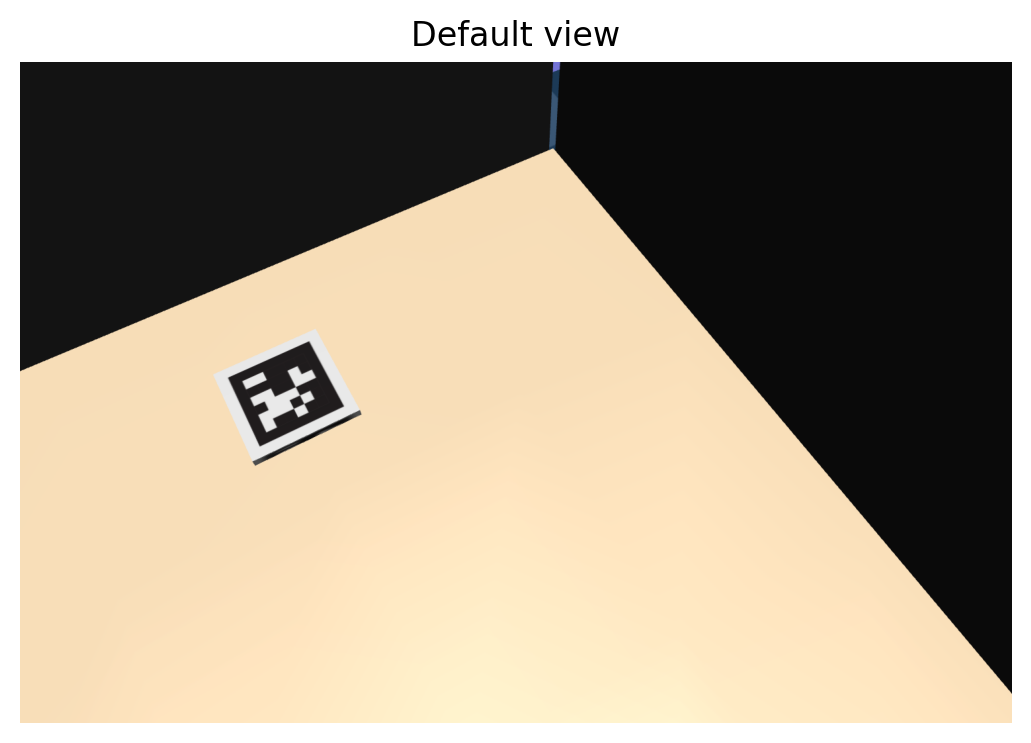

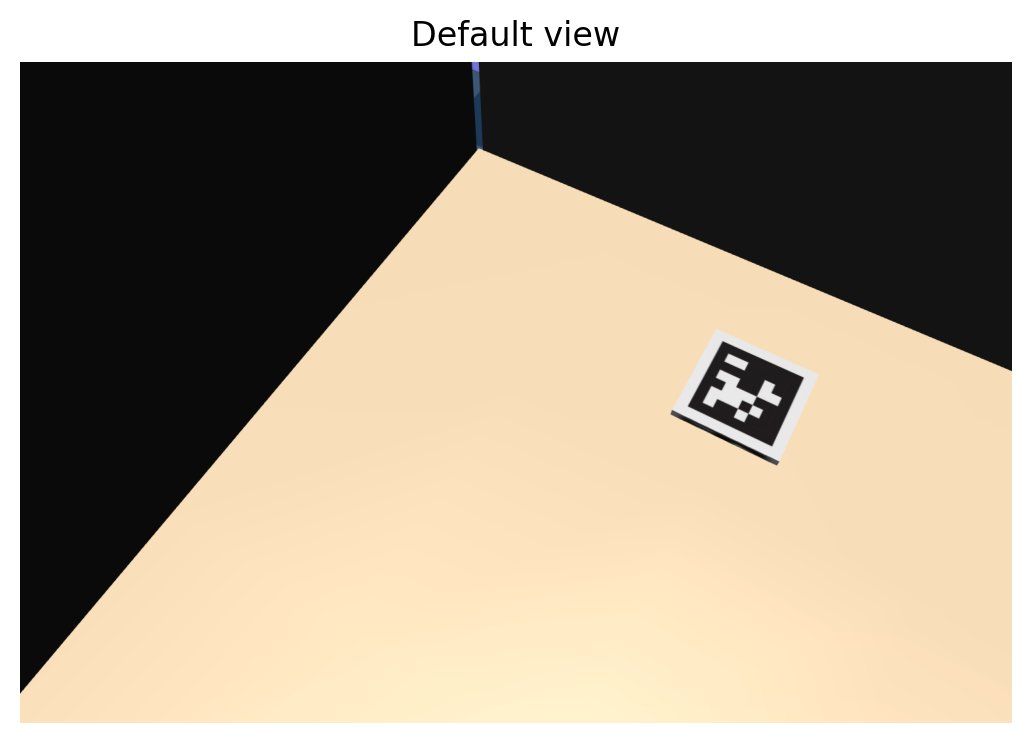

In [24]:
width = 1500
height = 1000

cam_infos_1 = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 30.0,
                    cam_elevation = -60.0,
                    cam_lookat    = [0.9,0.0,1.5])

cam_infos_2 = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = -30.0,
                    cam_elevation = -60.0,
                    cam_lookat    = [0.9,0.0,1.5])

# Set Joint Configurations
init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]
set_env_joint_configuration(env, init_configurations, prefix='ur_')
print_env_joint_infos(env, prefix='ur_')

for _ in range(2):
    img = env.render_scene(mode='rgb_array', cam_infos=cam_infos_1, width=width, height=height, depth_toggle=False, camera_name="track")
    img_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos_1, width=width, height=height, depth_toggle=True, camera_name="track")
    img_real = env.depth_2_meters(img_depth)

    img2 = env.render_scene(mode='rgb_array', cam_infos=cam_infos_2, width=width, height=height, depth_toggle=False, camera_name="track")
    img2_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos_2, width=width, height=height, depth_toggle=True, camera_name="track")
    img2_real = env.depth_2_meters(img2_depth)

plt.imshow(img); plt.axis('off')
plt.title("Default view")
plt.show()

# plt.imshow(img_depth); plt.axis('off')
# plt.title("Depth view")
# plt.colorbar()
# plt.show()

# plt.imshow(img_real); plt.axis('off')
# plt.title("Real depth view")
# plt.colorbar()
# plt.show()

plt.imshow(img2); plt.axis('off')
plt.title("Default view")
plt.show()

# plt.imshow(img2_depth); plt.axis('off')
# plt.title("Depth view")
# plt.colorbar()
# plt.show()

# plt.imshow(img2_real); plt.axis('off')
# plt.title("Real depth view")
# plt.colorbar()
# plt.show()

## Extract Keypoints using `SIFT`

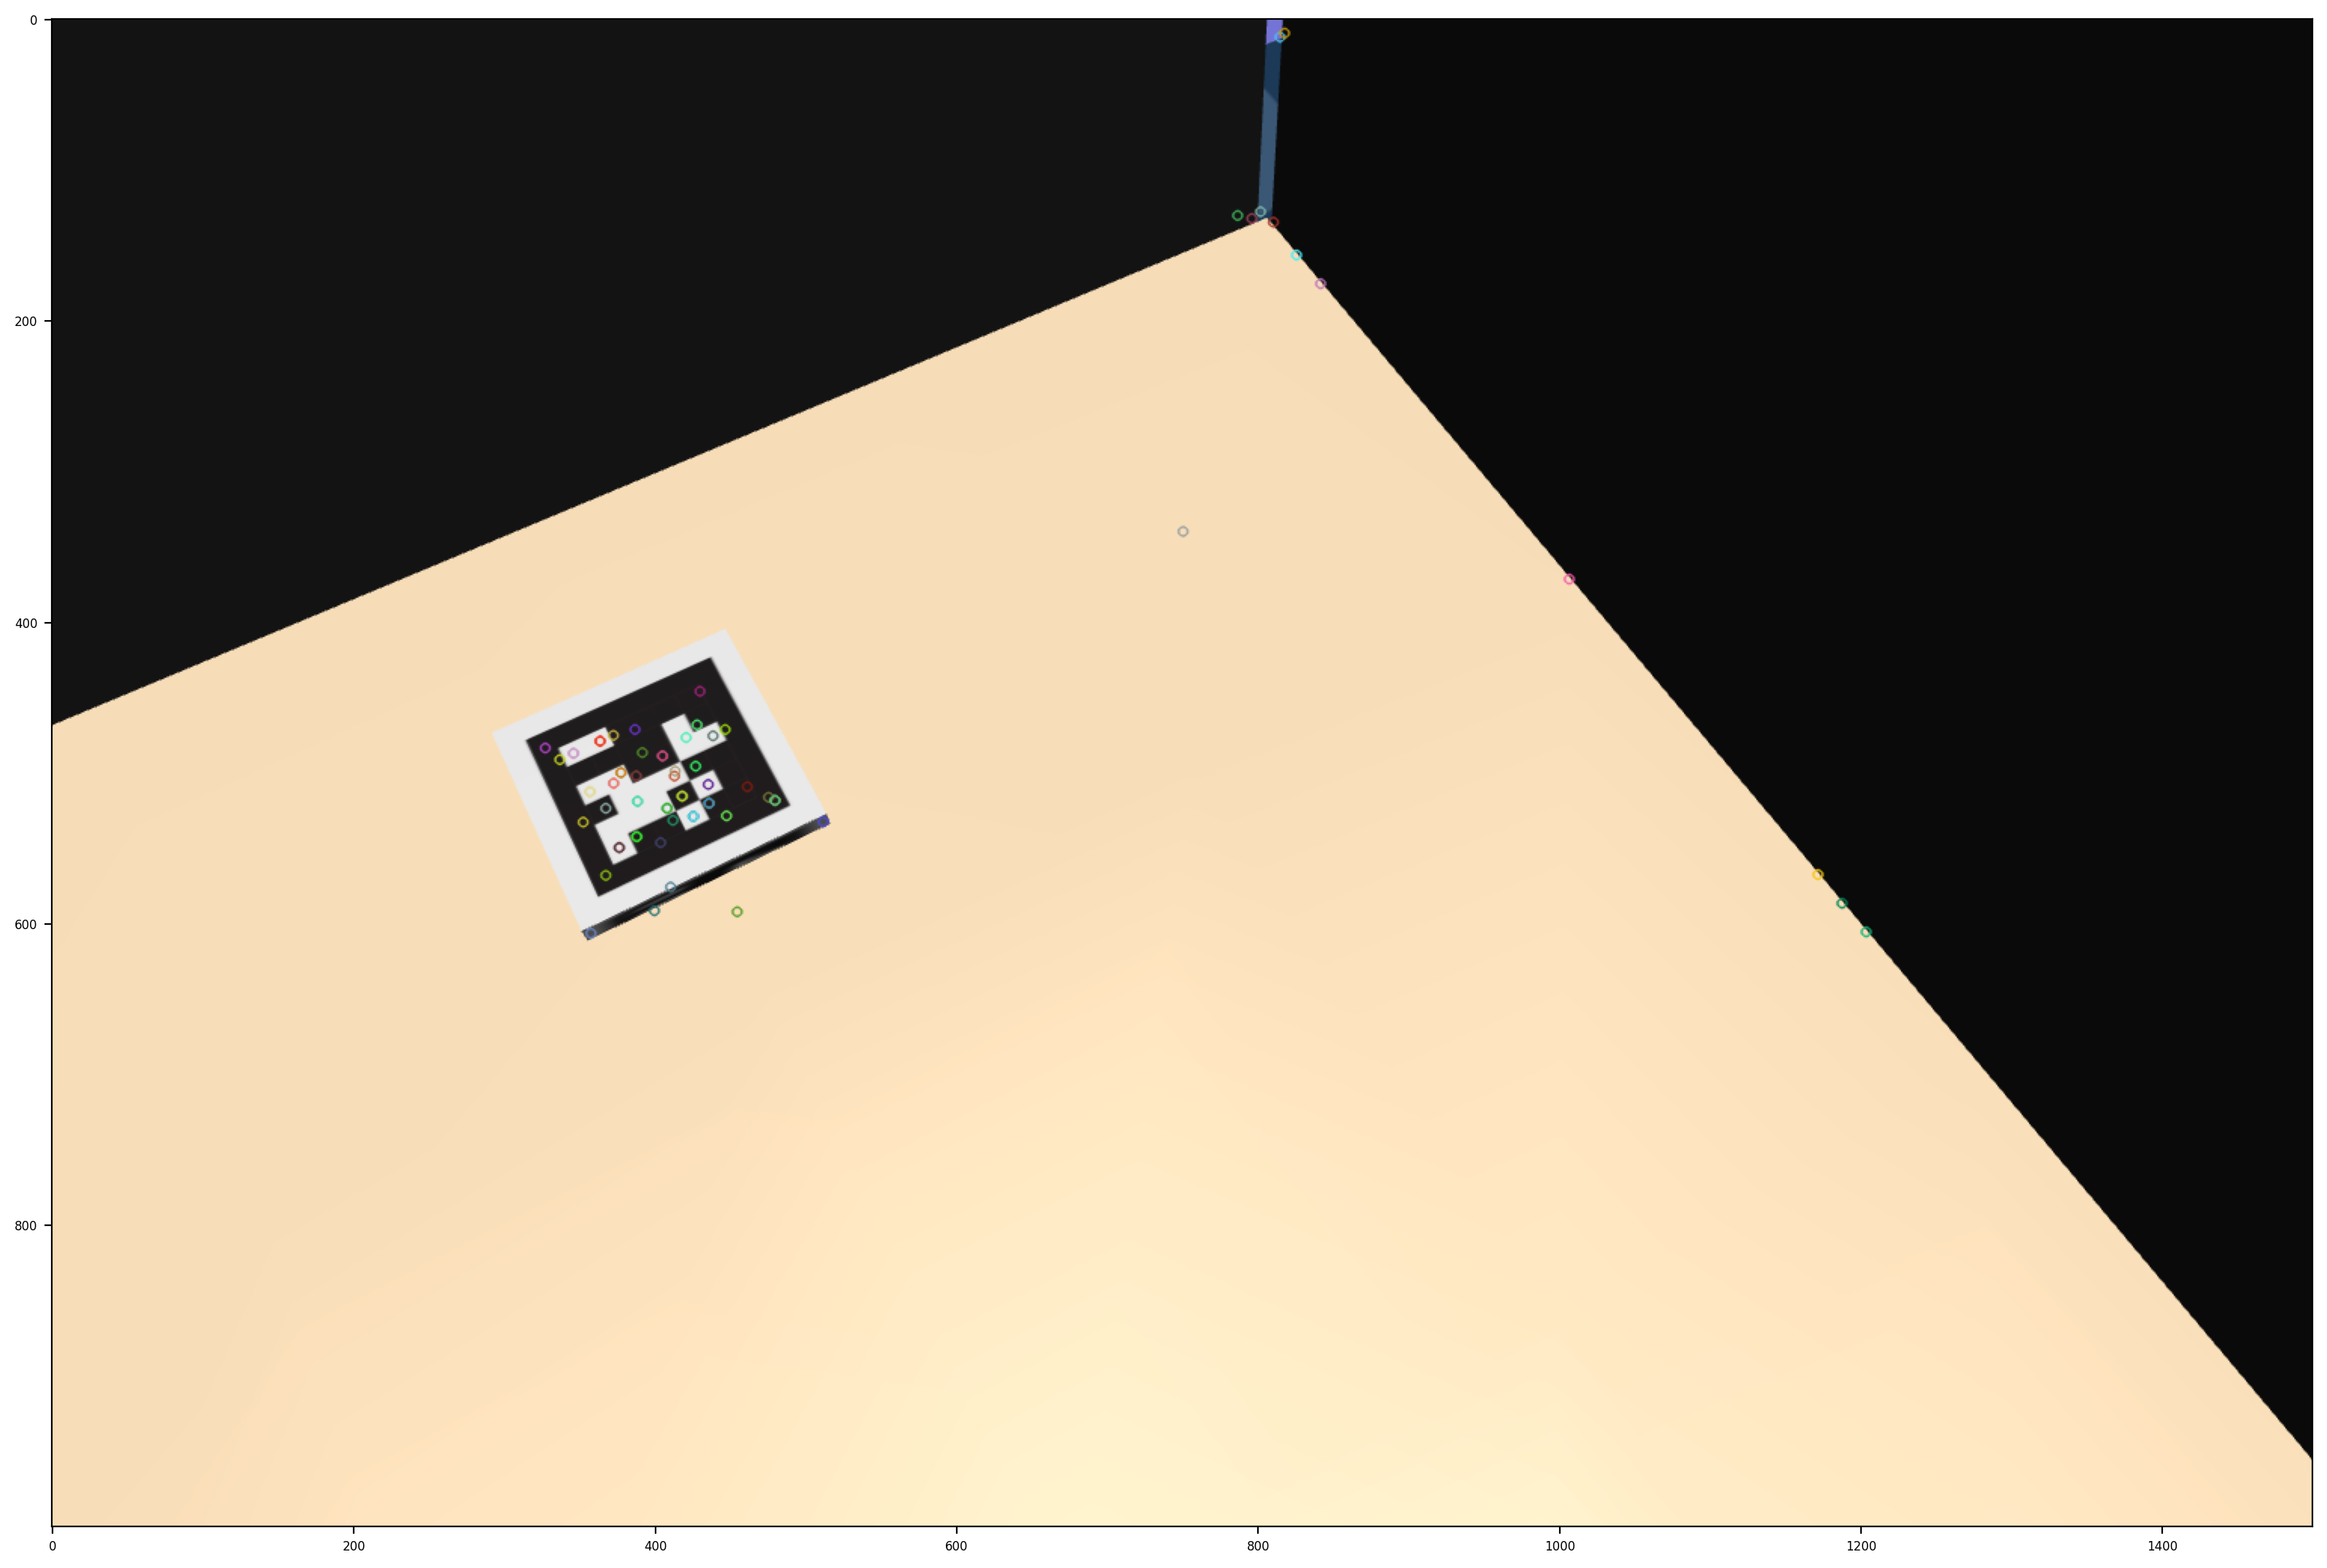

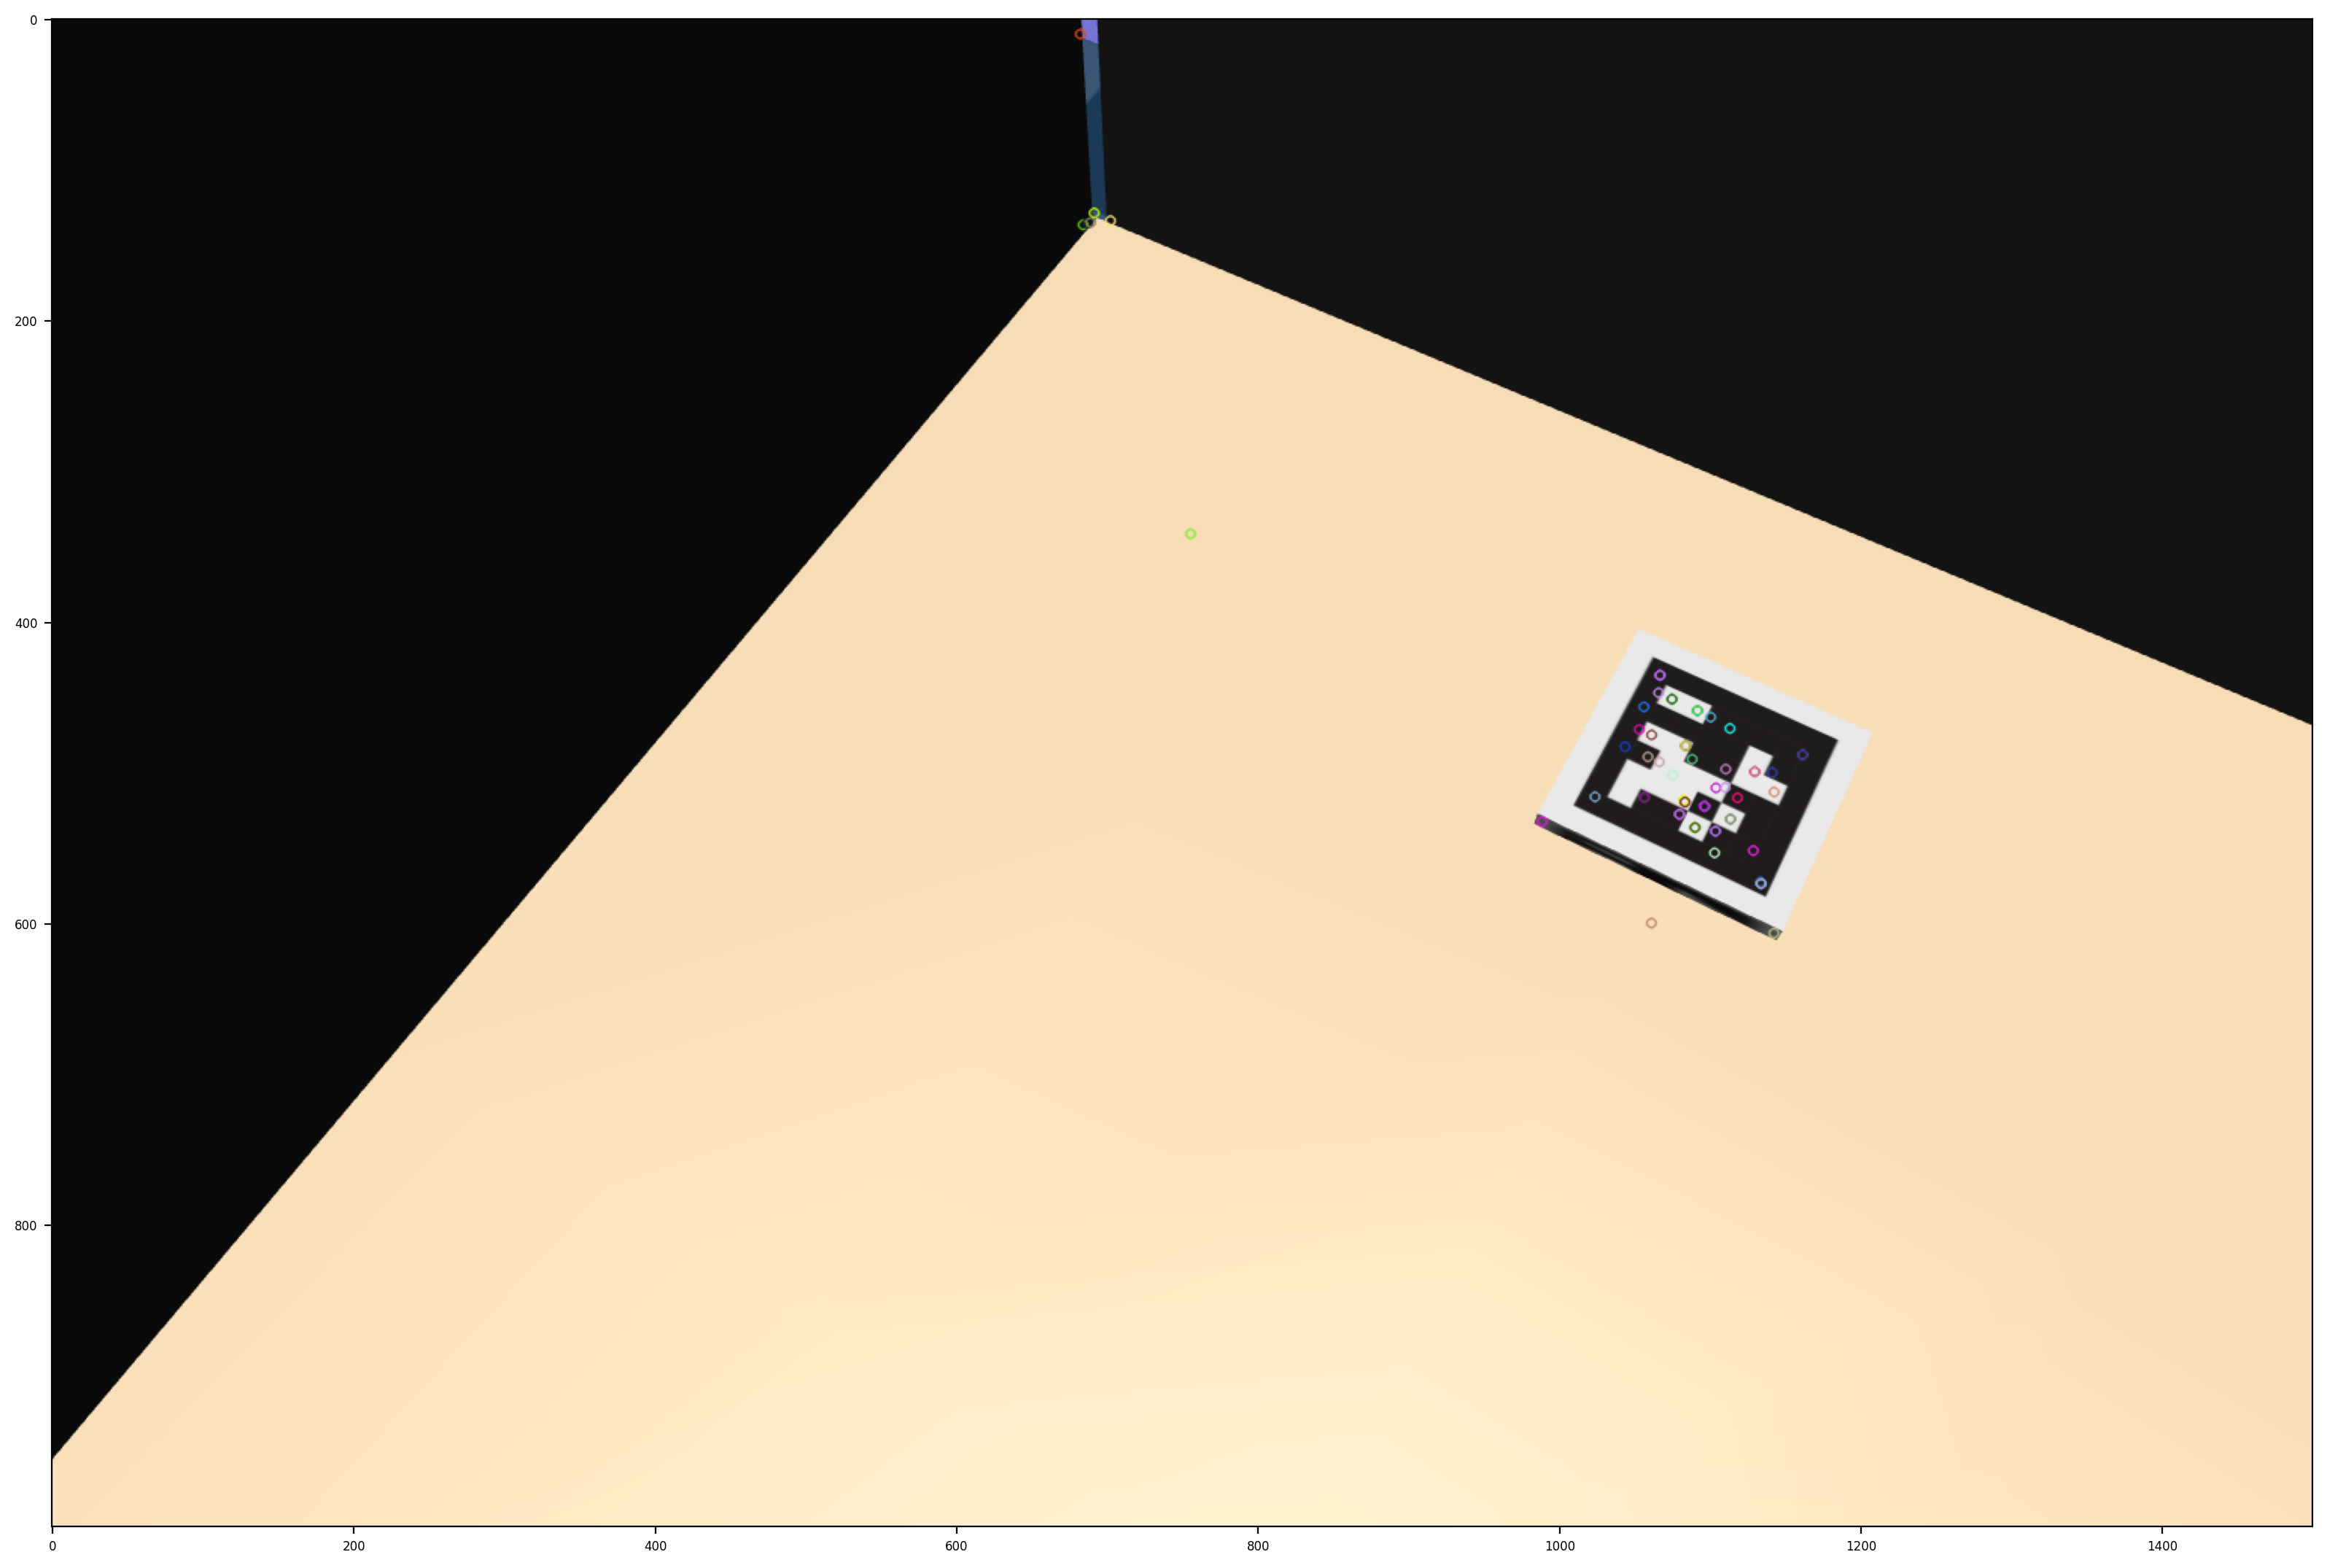

1000


In [29]:
import cv2

sift = cv2.SIFT_create()
img1_kp, img1_des = sift.detectAndCompute(img, None)
img2_kp, img2_des = sift.detectAndCompute(img2, None)

img1_draw = cv2.drawKeypoints(img, img1_kp, None)
img2_draw = cv2.drawKeypoints(img2, img2_kp, None)
plt.figure(figsize=(20, 20))
plt.imshow(img1_draw)
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(img2_draw)
plt.show()
print(len(img1_draw))

## Match Features using `BFMatcher`

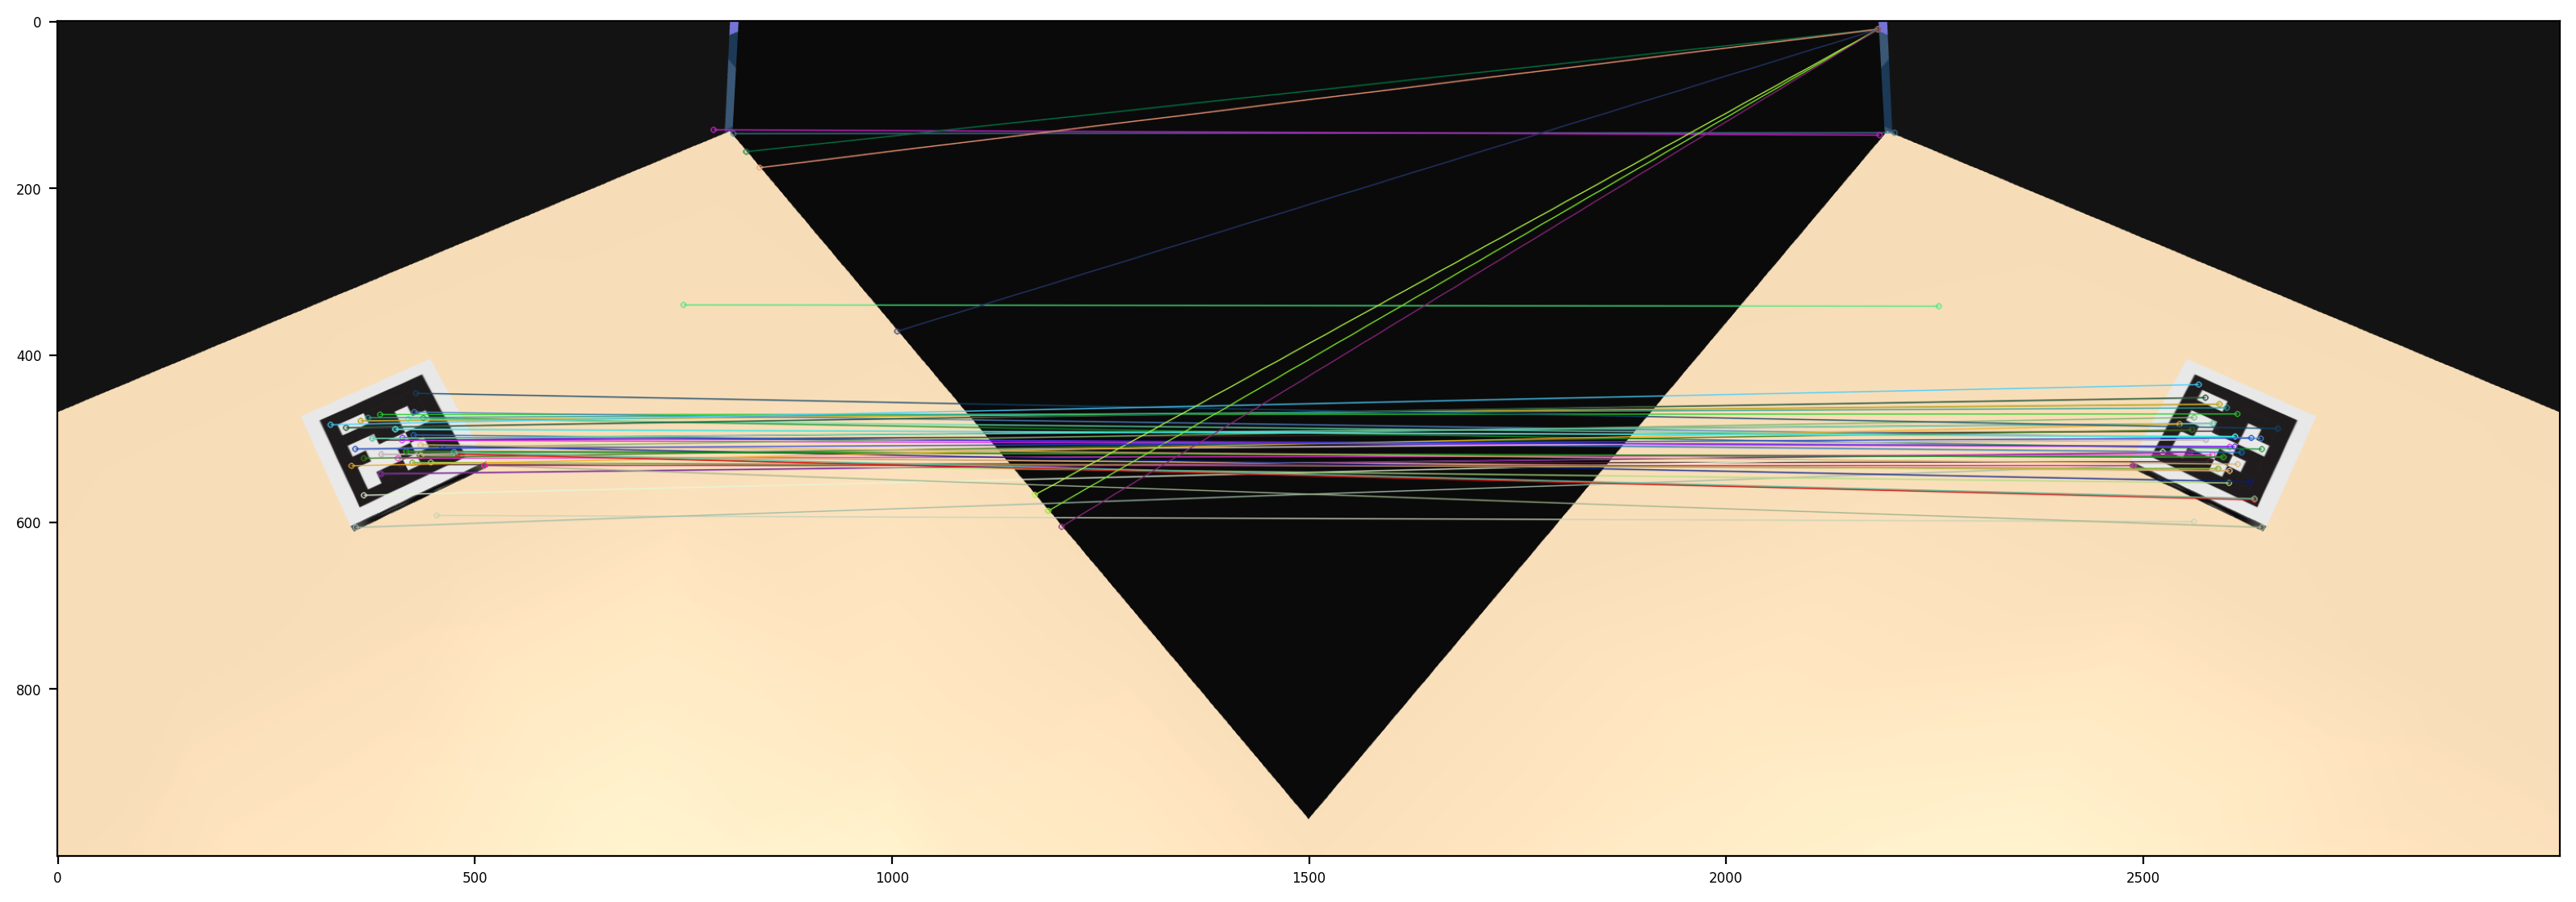

56


In [30]:
# Brute force matching with k=2
bf = cv2.BFMatcher()
matches = bf.knnMatch(img1_des, img2_des, k=2)
# bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# matches = bf.match(img1_des, img2_des)


# Ratio test and retrieval of indices
matches_good = [m1 for m1, m2 in matches if m1.distance < 0.80*m2.distance]

sorted_matches = sorted(matches_good, key=lambda x: x.distance)
res = cv2.drawMatches(img, img1_kp, img2, img2_kp, sorted_matches, img2, flags=2) 

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()
print(len(sorted_matches))

## Estimate `Essential` matrix using `RANSAC`

In [31]:
# queryIdx : 1번 이미지의 feature point index
# trainIdx : 2번 이미지의 feature point index
query_idx = [match.queryIdx for match in matches_good]
train_idx = [match.trainIdx for match in matches_good]

#Getting float based points from good matches
p1 = np.float32([img1_kp[ind].pt for ind in query_idx])
p2 = np.float32([img2_kp[ind].pt for ind in train_idx])

print(p1.shape)
print(p1[:3])

img1_pts = np.array([img1_kp[m.queryIdx].pt for m in matches_good]).reshape(-1, 1, 2).astype(np.float32) # 픽셀 좌표
img2_pts = np.array([img2_kp[m.trainIdx].pt for m in matches_good]).reshape(-1, 1, 2).astype(np.float32)

print(img1_pts.shape)
print(img1_pts[:3])

(56, 2)
[[327.02 483.14]
 [345.66 486.62]
 [345.66 486.62]]
(56, 1, 2)
[[[327.02 483.14]]

 [[345.66 486.62]]

 [[345.66 486.62]]]


In [32]:
E, mask = cv2.findEssentialMat(p1, p2, method=cv2.RANSAC, focal=3092.8, pp=(2016, 1512), maxIters = 500, threshold=1)

In [33]:
def randomsample(p1, p2):
    p1p2 = np.concatenate((p1, p2), axis=1)
    p1p2_ = p1p2[np.random.randint(p1p2.shape[0], size=len(p1)), :]
    p1s = p1p2_[:,:2]
    p2s = p1p2_[:,2:]
    return p1s, p2s

def RANSAC(p1, p2, iteration):
    
    b_inlier = np.array([[]]) # best inlier
    b_E = None # best Essential Matrix
    tmp_inlier_len = 0 # tmp inlier의 개수

    for i in range(iteration):
        
        # choice random sample
        p1s, p2s = randomsample(p1, p2)
        
        # 5-point algorithm (with intrinsic parameter, epipolar constraint = 0, no RANSAC) 
        cur_E, cur_inlier = cv2.findEssentialMat(p1s, p2s, focal=3092.8, pp=(2016, 1512),
                                                 maxIters = 0, threshold=0.1)

        # inlier 추출
        inlier_idx = np.where(cur_inlier==1)
        pts1 = np.vstack([p1[i] for i in inlier_idx[0]])
        pts2 = np.vstack([p2[i] for i in inlier_idx[0]])
        
        if cur_E is None:
            continue

        # inlier 수가 가장 많은 최적의 E 추출
        if len(pts1) > tmp_inlier_len: # 현재 inlier 수 > 가장 많은 inlier 수
            b_E = cur_E 
            b_inlier = cur_inlier 
            tmp_inlier_len = len(pts1)

    return b_E

In [34]:
def RANSAC2(p1, p2, iter, threshold):
    
    b_inlier = np.array([[]])
    b_E = None
    tmp_inlier_len = 0

    for i in range(iter):
    	# 5개의 Random sample 추출
        p1s, p2s = randomsample(p1, p2)
        
        # 5-point algorithm
        E, cur_inlier = cv2.findEssentialMat(p1s, p2s, maxIters = 0)

        # inlier 추출
        inlier_idx = np.where(cur_inlier==1)
        pts1 = np.vstack([p1[i] for i in inlier_idx[0]])
        pts2 = np.vstack([p2[i] for i in inlier_idx[0]])
        
        # intrinsic parameter 설정
        skew = 0.0215878
        K = np.array([[3092.8, skew, 2016], [0, 3092.8, 1512], [0,0,1]])
        K_inv = np.linalg.inv(K)
        
        # (x,y) -> Homogeneous Coordinate (x,y,1) 로 변환
        a, b = rescale_point(pts1, pts2, len(pts1))

        if E is None:
            continue
        
        # Epipolar constraint = 0
        cur_E = (b @ K_inv @ E @ K_inv.T @ a.T) 
		
        c = []
        for i in range(len(pts1)):
            c.append(cur_E[i][i])
        c = np.array(c)
        
        # inlier 수가 가장 많은 E 추출
        tmp_inlier_len = len(c[(c<threshold) & (c>0)])
        if len(pts1) > tmp_inlier_len: # 현재 inlier 수 > 최고 inlier 수
            b_E = cur_E 
            b_inlier = cur_inlier 
            tmp_inlier_len = len(pts1)
    
    return b_E

In [35]:
# x'T @ K^-1 T @ E @ K^-1 @ x = 0
ep_cons = (b @ K_inv @ E @ K_inv.T @ a.T)

NameError: name 'b' is not defined